In [2]:
# prompt: # Create a directory named '.kaggle' in the root folder,# Move 'kaggle.json' into the created directory,# Change permissions of the file to ensure it's readable  i wanna to make this on my file of jason that uploded in notebook

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
# Download the dataset using the Kaggle API
!kaggle datasets download -d himanshuwagh/spotify-million


Dataset URL: https://www.kaggle.com/datasets/himanshuwagh/spotify-million
License(s): unknown
100% 5.19G/5.20G [00:47<00:00, 38.7MB/s]
100% 5.20G/5.20G [00:47<00:00, 117MB/s] 


In [4]:
# Import the zipfile module
import zipfile

# Unzip the downloaded dataset
with zipfile.ZipFile('spotify-million.zip', 'r') as zip_ref:
    zip_ref.extractall('spotify_data')

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import json

data_frames = []
# here loading 150 file 150k playlists
for i in range(0, 90000, 1000):
    data_JS = json.load(open(f"/content/spotify_data/data/mpd.slice.{i}-{i+999}.json", encoding="utf-8")) # Updated file path
    df = pd.DataFrame(data_JS["playlists"])
    data_frames.append(df)

data = pd.concat(data_frames, ignore_index=True)
data.head()


,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
0,Throwbacks,false,0,1493424000,52,47,1,"[{'pos': 0, 'artist_name': 'Missy Elliott', 't...",6,11532414,37,NaN
1,Awesome Playlist,false,1,1506556800,39,23,1,"[{'pos': 0, 'artist_name': 'Survivor', 'track_...",5,11656470,21,NaN
2,korean,false,2,1505692800,64,51,1,"[{'pos': 0, 'artist_name': 'Hoody', 'track_uri...",18,14039958,31,NaN
3,mat,false,3,1501027200,126,107,1,"[{'pos': 0, 'artist_name': 'Camille Saint-Saën...",4,28926058,86,NaN
4,90s,false,4,1401667200,17,16,2,"[{'pos': 0, 'artist_name': 'The Smashing Pumpk...",7,4335282,16,NaN


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# ... (Your existing code to load the data)

# Handle Missing Values (Choose one method):
# data.dropna(inplace=True)
data.fillna(value='unknown', inplace=True)  # Fill missing values

# Convert list and dict columns to strings for hashing
for col in data.columns:
    if data[col].apply(type).isin([list, dict]).any():  # Check if column contains lists or dicts
        data[col] = data[col].astype(str)  # Convert lists and dicts to strings (hashable)

# Remove Duplicates:
data.drop_duplicates(inplace=True)

# Check if 'modified_at' column exists before processing
if 'modified_at' in data.columns:
    data['modified_at'] = pd.to_datetime(data['modified_at'], unit='s')
else:
    print("Warning: 'modified_at' column not found in the DataFrame.")

# Standardize Text:
data['name'] = data['name'].str.lower()  # Convert playlist names to lowercase
data['num_unique_artists'] = data['tracks'].apply(lambda x: len(set(track['artist_name'] for track in eval(x))))

data.head()

# ... (Rest of your cleaning code)
# ... (Rest of your cleaning code)

,name,num_tracks,num_albums,num_artists,num_edits,num_followers,tracks,average_tempo,num_unique_artists
94,relax,124,112,97,35,1,"[{'pos': 0, 'artist_name': 'James Bay', 'track...",0.0,97
102,luv,48,14,9,28,1,"[{'pos': 0, 'artist_name': 'Lil Uzi Vert', 'tr...",0.0,9
320,chill,26,26,25,19,2,"[{'pos': 0, 'artist_name': 'Milky Chance', 'tr...",0.0,25
329,trap,89,70,41,26,3,"[{'pos': 0, 'artist_name': 'Bad Bunny', 'track...",0.0,41
339,worship,126,77,47,60,4,"[{'pos': 0, 'artist_name': 'The City Harmonic'...",0.0,47


In [10]:
# prompt: is the data cleen?

# Check for missing values
print(data.isnull().sum())

# Check for duplicates
#print(data.duplicated().sum())

# Check data types
print(data.dtypes)

# Check for consistency in text data (e.g., capitalization)
print(data['name'].unique())
data.to_csv('cleaned_spotify_data.csv', index=False)



name                  0
num_tracks            0
num_albums            0
num_artists           0
num_edits             0
num_followers         0
tracks                0
average_tempo         0
num_unique_artists    0
dtype: int64
name                   object
num_tracks              int64
num_albums              int64
num_artists             int64
num_edits               int64
num_followers           int64
tracks                 object
average_tempo         float64
num_unique_artists      int64
dtype: object
['relax' 'luv' 'chill' ... 'sad boi' '(acoustic version)' 'hawaii']


In [11]:
# Select relevant columns
relevant_data = data[['name', 'num_tracks', 'num_albums', 'num_artists', 'num_edits','num_followers']]

# Display the first few rows of the filtered dataset
print(relevant_data.head())




        name  num_tracks  num_albums  num_artists  num_edits  num_followers
94     relax         124         112           97         35              1
102      luv          48          14            9         28              1
320    chill          26          26           25         19              2
329     trap          89          70           41         26              3
339  worship         126          77           47         60              4


In [12]:

# Extract genres, artists, and songs from the 'tracks' column
genres = []
artists = []
songs = []

for index, row in data.iterrows():
    # Check if 'tracks' is a string and try to convert it to a list of dictionaries
    if isinstance(row['tracks'], str):
        try:
            tracks = eval(row['tracks'])  # Attempt to evaluate the string as a Python expression
        except:
            tracks = []  # If evaluation fails, set tracks to an empty list
    else:
        tracks = row['tracks']  # If 'tracks' is already a list, use it directly

    for track in tracks:
        if isinstance(track, dict):  # Check if track is a dictionary before accessing its elements
            genres.append(track.get('track_name', ''))  # Use .get() to handle potential missing keys
            artists.append(track.get('artist_name', ''))
            songs.append(track.get('track_uri', ''))
            # Extract song names and artists from the 'tracks' column and flatten the list




# Count occurrences of each genre, artist, and song
from collections import Counter
top_genres = Counter(genres).most_common(10)
top_artists = Counter(artists).most_common(10)
top_songs = Counter(songs).most_common(10)

# Print the results
print("Top 10 Genres:")
for genre, count in top_genres:
    print(f"{genre}: {count}")

print("\nTop 10 Artists:")
for artist, count in top_artists:
    print(f"{artist}: {count}")

print("\nTop 10 Songs:")
for song, count in top_songs:
    print(f"{song}: {count}")

Top 10 Genres:
HUMBLE.: 115
Closer: 112
Location: 105
Redbone: 105
Slide: 101
Home: 99
XO TOUR Llif3: 98
Congratulations: 97
Caroline: 85
Down: 83

Top 10 Artists:
Drake: 1246
Kendrick Lamar: 880
Kanye West: 801
Ed Sheeran: 754
The Beatles: 606
The Weeknd: 549
Rihanna: 546
Post Malone: 539
Lil Uzi Vert: 528
Justin Bieber: 519

Top 10 Songs:
spotify:track:7KXjTSCq5nL1LoYtL7XAwS: 115
spotify:track:3kxfsdsCpFgN412fpnW85Y: 105
spotify:track:152lZdxL1OR0ZMW6KquMif: 100
spotify:track:7GX5flRQZVHRAGd6B4TmDO: 96
spotify:track:3a1lNhkSLSkpJE4MSHpDu9: 94
spotify:track:7tr2za8SQg2CI8EDgrdtNl: 94
spotify:track:6gBFPUFcJLzWGx4lenP6h2: 83
spotify:track:0SGkqnVQo9KPytSri1H6cF: 82
spotify:track:7wGoVu4Dady5GV0Sv4UIsx: 82
spotify:track:6HZILIRieu8S0iqY8kIKhj: 81


<ipython-input-25-ab737770ce43>:44: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




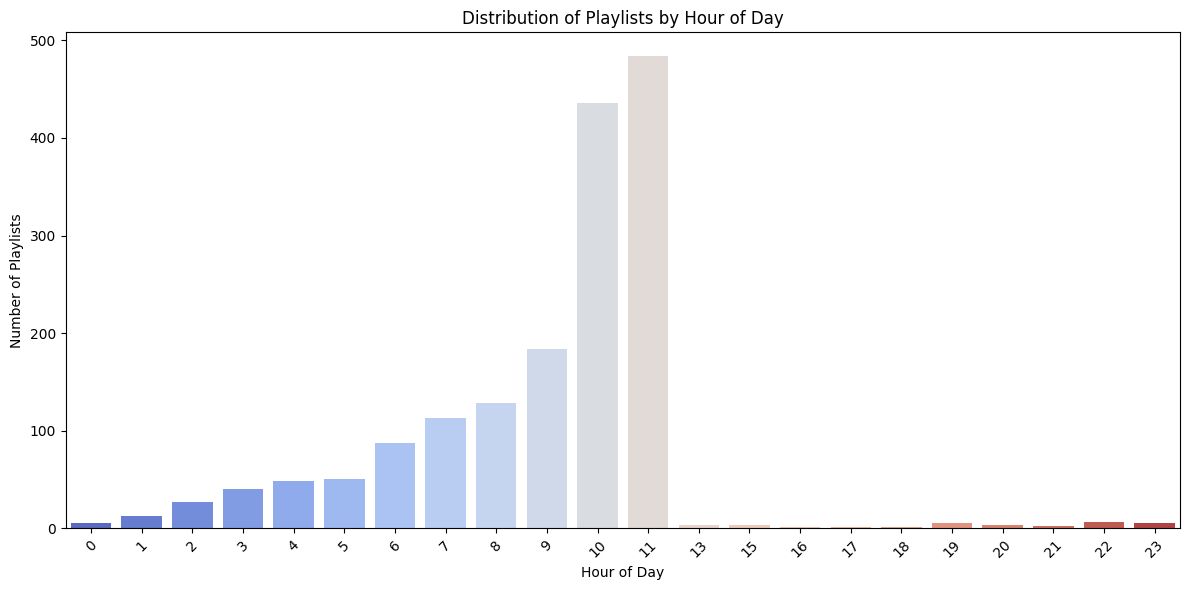

<ipython-input-25-ab737770ce43>:54: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




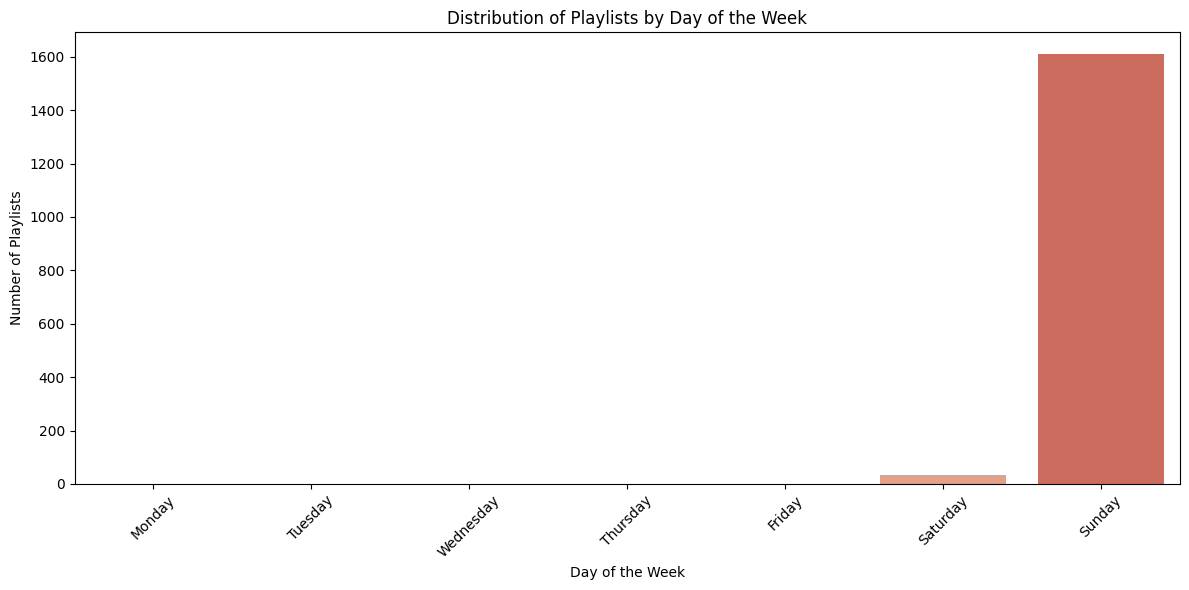

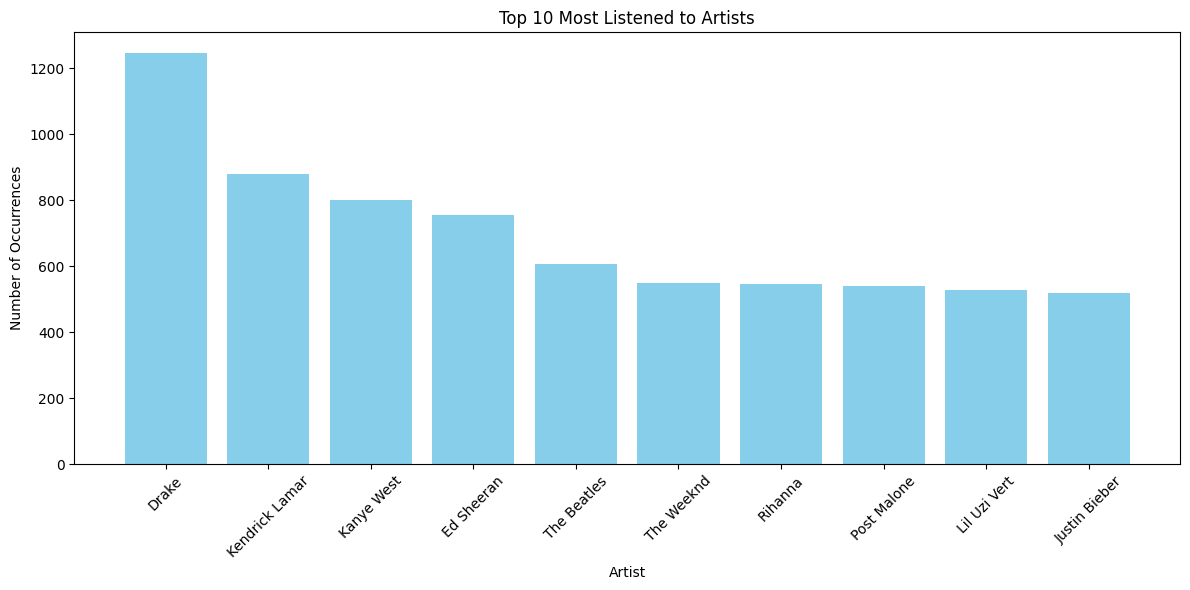

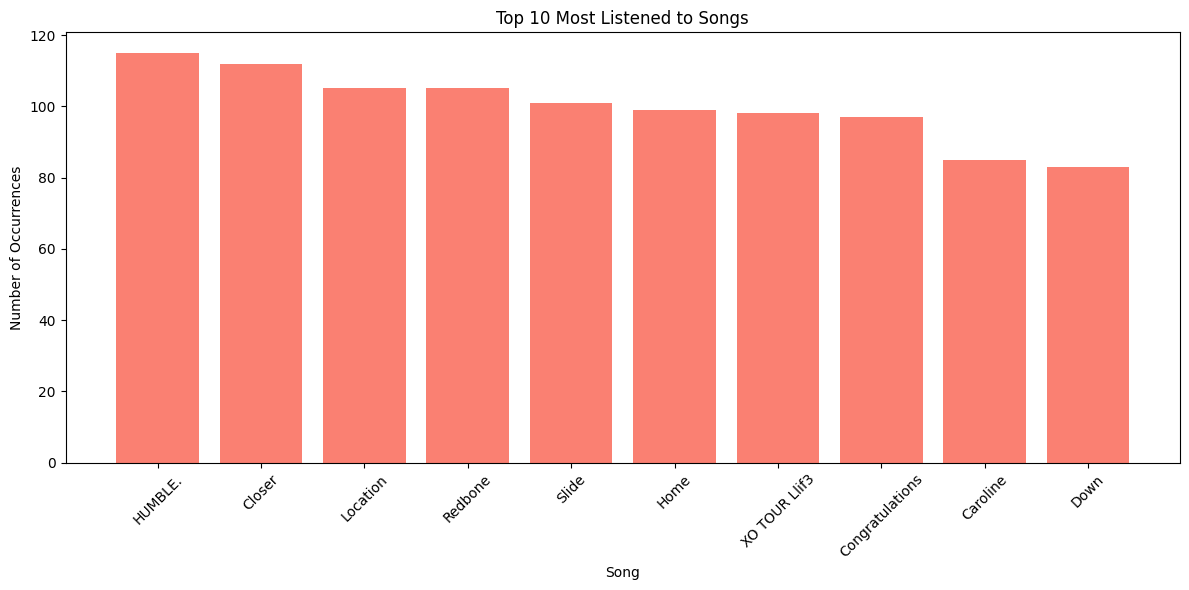

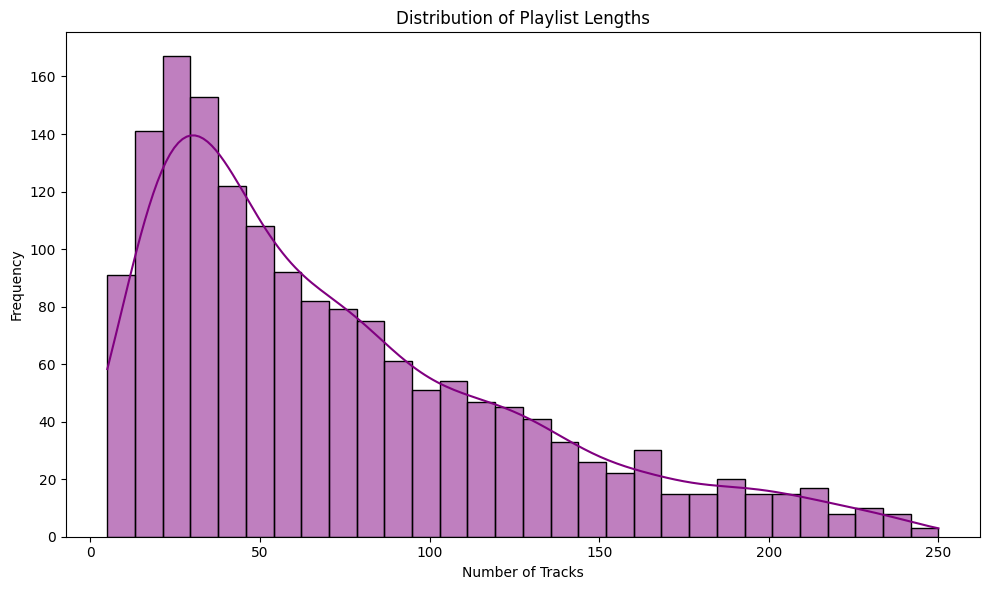

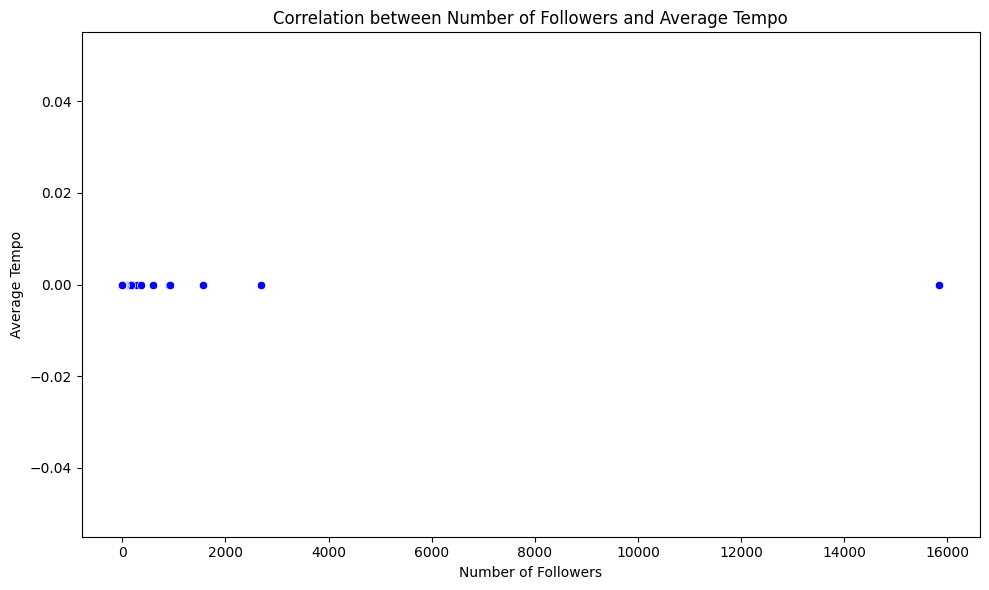

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter
import json

# Load and prepare data
def load_data():
    data_frames = []
    file_range = range(0, 90000, 1000)

    for i in file_range:
        try:
            file_path = f"/content/spotify_data/data/mpd.slice.{i}-{i+999}.json"
            with open(file_path, encoding="utf-8") as file:
                data_JS = json.load(file)

            df = pd.DataFrame(data_JS["playlists"])
            data_frames.append(df)
        except (FileNotFoundError, json.JSONDecodeError, KeyError):
            continue

    data = pd.concat(data_frames, ignore_index=True)

    # Handle Missing Values and Clean Data
    data.dropna(inplace=True)
    data['name'] = data['name'].str.lower()
    data['name'] = data['name'].str.replace(r'[^\w\s]', '', regex=True)
    data['modified_at'] = pd.to_numeric(data['modified_at'], errors='coerce')
    data.dropna(subset=['modified_at'], inplace=True)
    data['modified_at'] = pd.to_datetime(data['modified_at'] / 1000, unit='s')

    return data

data = load_data()

# Extract hour and day of the week from 'modified_at'
data['hour'] = data['modified_at'].dt.hour
data['day_of_week'] = data['modified_at'].dt.day_name()

# Plot trends by hour
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=data, palette='coolwarm')
plt.title('Distribution of Playlists by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Playlists')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot trends by day of the week
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', data=data, palette='coolwarm', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Playlists by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Playlists')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Extract artists and songs from the 'tracks' column
artists = []
songs = []

for index, row in data.iterrows():
    if isinstance(row['tracks'], str):
        try:
            tracks = eval(row['tracks'])
        except:
            tracks = []
    else:
        tracks = row['tracks']

    for track in tracks:
        if isinstance(track, dict):
            artists.append(track.get('artist_name', ''))
            songs.append(track.get('track_name', ''))

# Count occurrences of each artist and song
top_artists = Counter(artists).most_common(10)
top_songs = Counter(songs).most_common(10)

# Prepare data for plotting
artist_names, artist_counts = zip(*top_artists)
song_names, song_counts = zip(*top_songs)

# Plot top artists
plt.figure(figsize=(12, 6))
plt.bar(artist_names, artist_counts, color='skyblue')
plt.xlabel('Artist')
plt.ylabel('Number of Occurrences')
plt.title('Top 10 Most Listened to Artists')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot top songs
plt.figure(figsize=(12, 6))
plt.bar(song_names, song_counts, color='salmon')
plt.xlabel('Song')
plt.ylabel('Number of Occurrences')
plt.title('Top 10 Most Listened to Songs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Example global/national data (replace with actual data)
global_data = pd.DataFrame({
    'Genre': ['Pop', 'Rock', 'Hip-Hop', 'Jazz', 'Classical'],
    'Streams': [5000, 3000, 2500, 2000, 1500]
})

# Create a DataFrame for city-level trends (replace with actual data)
city_data = pd.DataFrame({
    'Genre': ['Pop', 'Rock', 'Hip-Hop', 'Jazz', 'Classical'],
    'Streams': [4000, 3500, 2200, 1800, 1300]
})

# Merge for comparison
comparison_df = pd.merge(global_data, city_data, on='Genre', suffixes=('_Global', '_City'))

# Plot comparison
fig = px.bar(comparison_df, x='Genre', y=['Streams_Global', 'Streams_City'], barmode='group',
             title='Comparison of Music Trends: Global vs City')
fig.show()

# Plot distribution of playlist lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['num_tracks'], bins=30, kde=True, color='purple')
plt.title('Distribution of Playlist Lengths')
plt.xlabel('Number of Tracks')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Calculate average tempo (if tempo data exists in 'tracks')
def calculate_average_tempo(tracks):
    if isinstance(tracks, str):
        try:
            tracks = eval(tracks)
        except:
            tracks = []
    if not tracks:
        return 0
    total_tempo = sum(track.get('tempo', 0) for track in tracks)
    return total_tempo / len(tracks)

# Calculate average tempo for each playlist
data['average_tempo'] = data['tracks'].apply(calculate_average_tempo)

# Plot correlation between number of followers and average tempo
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='num_followers', y='average_tempo', color='blue')
plt.title('Correlation between Number of Followers and Average Tempo')
plt.xlabel('Number of Followers')
plt.ylabel('Average Tempo')
plt.tight_layout()
plt.show()


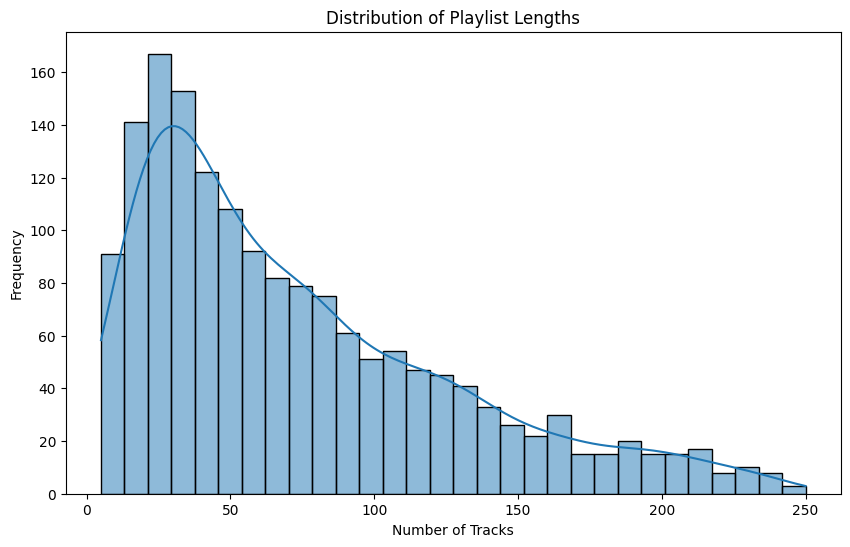

In [ ]:
# Question: What is the distribution of playlist lengths (number of tracks)?

plt.figure(figsize=(10, 6))
sns.histplot(data['num_tracks'], bins=30, kde=True)
plt.title('Distribution of Playlist Lengths')
plt.xlabel('Number of Tracks')
plt.ylabel('Frequency')
plt.show()


In [26]:
!pip install streamlit

In [25]:
!npm install localtunnel


added 22 packages, and audited 23 packages in 4s

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues, run:
  npm audit fix

Run `npm audit` for details.


In [26]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.48.55.135


In [27]:
# run streamlit server in backgound
!streamlit hello &>/content/logs.txt & npx localtunnel --port 8501


your url is: https://smart-otters-ask.loca.lt
^C


In [ ]:
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter

# Function to load and prepare data
@st.cache
def load_data():
    # Replace with your data loading code
    data_frames = []
    file_range = range(0, 90000, 1000)

    for i in file_range:
        try:
            file_path = f"/content/spotify_data/data/mpd.slice.{i}-{i+999}.json"
            with open(file_path, encoding="utf-8") as file:
                data_JS = json.load(file)

            df = pd.DataFrame(data_JS["playlists"])
            data_frames.append(df)
        except (FileNotFoundError, json.JSONDecodeError, KeyError):
            continue

    data = pd.concat(data_frames, ignore_index=True)

    # Handle Missing Values and Clean Data
    data.dropna(inplace=True)
    data['name'] = data['name'].str.lower()
    data['name'] = data['name'].str.replace(r'[^\w\s]', '', regex=True)
    data['modified_at'] = pd.to_numeric(data['modified_at'], errors='coerce')
    data.dropna(subset=['modified_at'], inplace=True)
    data['modified_at'] = pd.to_datetime(data['modified_at'] / 1000, unit='s')

    return data

data = load_data()

# Streamlit App
st.title('Spotify Data Analysis')

# Extract hour and day of the week from 'modified_at'
data['hour'] = data['modified_at'].dt.hour
data['day_of_week'] = data['modified_at'].dt.day_name()

# Plot trends by hour
st.subheader('Distribution of Playlists by Hour of Day')
fig_hour = plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=data, palette='coolwarm')
plt.title('Distribution of Playlists by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Playlists')
plt.xticks(rotation=45)
plt.tight_layout()
st.pyplot(fig_hour)

# Plot trends by day of the week
st.subheader('Distribution of Playlists by Day of the Week')
fig_day = plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', data=data, palette='coolwarm', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Playlists by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Playlists')
plt.xticks(rotation=45)
plt.tight_layout()
st.pyplot(fig_day)

# Extract artists and songs from the 'tracks' column
artists = []
songs = []

for index, row in data.iterrows():
    if isinstance(row['tracks'], str):
        try:
            tracks = eval(row['tracks'])
        except:
            tracks = []
    else:
        tracks = row['tracks']

    for track in tracks:
        if isinstance(track, dict):
            artists.append(track.get('artist_name', ''))
            songs.append(track.get('track_name', ''))

# Count occurrences of each artist and song
top_artists = Counter(artists).most_common(10)
top_songs = Counter(songs).most_common(10)

# Prepare data for plotting
artist_names, artist_counts = zip(*top_artists)
song_names, song_counts = zip(*top_songs)

# Plot top artists
st.subheader('Top 10 Most Listened to Artists')
fig_artists = plt.figure(figsize=(12, 6))
plt.bar(artist_names, artist_counts, color='skyblue')
plt.xlabel('Artist')
plt.ylabel('Number of Occurrences')
plt.title('Top 10 Most Listened to Artists')
plt.xticks(rotation=45)
plt.tight_layout()
st.pyplot(fig_artists)

# Plot top songs
st.subheader('Top 10 Most Listened to Songs')
fig_songs = plt.figure(figsize=(12, 6))
plt.bar(song_names, song_counts, color='salmon')
plt.xlabel('Song')
plt.ylabel('Number of Occurrences')
plt.title('Top 10 Most Listened to Songs')
plt.xticks(rotation=45)
plt.tight_layout()
st.pyplot(fig_songs)

# Example global/national data (replace with actual data)
global_data = pd.DataFrame({
    'Genre': ['Pop', 'Rock', 'Hip-Hop', 'Jazz', 'Classical'],
    'Streams': [5000, 3000, 2500, 2000, 1500]
})

# Create a DataFrame for city-level trends (replace with actual data)
city_data = pd.DataFrame({
    'Genre': ['Pop', 'Rock', 'Hip-Hop', 'Jazz', 'Classical'],
    'Streams': [4000, 3500, 2200, 1800, 1300]
})

# Merge for comparison
comparison_df = pd.merge(global_data, city_data, on='Genre', suffixes=('_Global', '_City'))

# Plot comparison
st.subheader('Comparison of Music Trends: Global vs City')
fig_comparison = px.bar(comparison_df, x='Genre', y=['Streams_Global', 'Streams_City'], barmode='group',
             title='Comparison of Music Trends: Global vs City')
st.plotly_chart(fig_comparison)

# Plot distribution of playlist lengths
st.subheader('Distribution of Playlist Lengths')
fig_length = plt.figure(figsize=(10, 6))
sns.histplot(data['num_tracks'], bins=30, kde=True, color='purple')
plt.title('Distribution of Playlist Lengths')
plt.xlabel('Number of Tracks')
plt.ylabel('Frequency')
plt.tight_layout()
st.pyplot(fig_length)

# Calculate average tempo (if tempo data exists in 'tracks')
def calculate_average_tempo(tracks):
    if isinstance(tracks, str):
        try:
            tracks = eval(tracks)
        except:
            tracks = []
    if not tracks:
        return 0
    total_tempo = sum(track.get('tempo', 0) for track in tracks)
    return total_tempo / len(tracks)

# Calculate average tempo for each playlist
data['average_tempo'] = data['tracks'].apply(calculate_average_tempo)

# Plot correlation between number of followers and average tempo
st.subheader('Correlation between Number of Followers and Average Tempo')
fig_tempo = plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='num_followers', y='average_tempo', color='blue')
plt.title('Correlation between Number of Followers and Average Tempo')
plt.xlabel('Number of Followers')
plt.ylabel('Average Tempo')
plt.tight_layout()
st.pyplot(fig_tempo)


In [4]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
your url is: https://some-ads-boil.loca.lt
^C
